<a href="https://colab.research.google.com/github/liteshperumalla/litesh_perumalla_INFO5731_Spring2025/blob/main/Perumalla_Litesh_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import re
import csv
from collections import defaultdict


def read_reviews_from_csv(file_path):
    reviews = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            reviews.append(row["Cleaned_Review"])
    return reviews

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    return words


def count_ngrams(words, n):
    ngram_counts = defaultdict(int)
    for i in range(len(words) - n + 1):
        ngram = tuple(words[i:i + n])
        ngram_counts[ngram] += 1
    return ngram_counts


file_path = "/content/amazon_reviews_cleaned.csv"
reviews = read_reviews_from_csv(file_path)


bigram_counts = defaultdict(int)
trigram_counts = defaultdict(int)
word_counts = defaultdict(int)


for review in reviews:
    words = preprocess_text(review)
    for word in words:
        word_counts[word] += 1
    for bigram in count_ngrams(words, 2):
        bigram_counts[bigram] += 1
    for trigram in count_ngrams(words, 3):
        trigram_counts[trigram] += 1


bigram_probabilities = {}
for (w1, w2), count in bigram_counts.items():
    bigram_probabilities[(w1, w2)] = count / word_counts[w1]


noun_phrases = defaultdict(int)
for review in reviews:
    words = preprocess_text(review)
    for i in range(len(words) - 1):
        if words[i] in {"a", "an", "the"}:
            noun_phrase = words[i] + " " + words[i + 1]
            noun_phrases[noun_phrase] += 1

def extract_noun_phrases(text):
    """
    Extracts noun phrases from text using a simple heuristic approach.
    """
    words = text.lower().split()
    noun_phrases = []

    for i in range(len(words) - 1):
        noun_phrases.append(f"{words[i]} {words[i+1]}")

    return noun_phrases
noun_phrase_frequencies = {}

for doc in reviews:
    noun_phrases = extract_noun_phrases(doc)
    for np in noun_phrases:
        noun_phrase_frequencies[np] = noun_phrase_frequencies.get(np, 0) + 1
        max_frequency = max(noun_phrase_frequencies.values(), default=1)

max_frequency = max(noun_phrase_frequencies.values())

relative_probabilities = {}
for np, freq in noun_phrase_frequencies.items():
    relative_probabilities[np] = freq / max_frequency

print("\nBigram Frequencies:")
for bigram, count in bigram_counts.items():
    print(f"{bigram}: {count}")

print("\nTrigram Frequencies:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

print("\nBigram Probabilities:")
for bigram, prob in bigram_probabilities.items():
    print(f"P({bigram[1]} | {bigram[0]}) = {prob:.2f}")

print("\nNoun Phrase Relative Probabilities:")
print("{:<20} {:<10}".format("Noun Phrase", "Rel. Prob"))
for np, prob in relative_probabilities.items():
    print(f"{np:<20} {prob:.2f}")



Bigram Frequencies:
('this', 'along'): 101
('along', 'tempered'): 101
('tempered', 'glass'): 101
('glass', 'screen'): 101
('screen', 'lens'): 101
('lens', 'protector'): 101
('protector', 'kept'): 101
('kept', 'brand'): 101
('brand', 'new'): 101
('new', 'iphone'): 202
('iphone', '16'): 202
('16', 'pro'): 303
('pro', 'max'): 303
('max', 'pristine'): 101
('pristine', 'condition'): 101
('condition', 'magsafe'): 101
('magsafe', 'work'): 101
('work', 'perfectly'): 202
('perfectly', 'just'): 101
('just', 'wished'): 101
('wished', 'protected'): 101
('protected', 'better'): 101
('better', 'design'): 101
('design', 'protruding'): 101
('protruding', 'quite'): 101
('quite', 'far'): 101
('far', 'border'): 101
('border', 'required'): 101
('required', 'keep'): 101
('keep', 'hitting'): 101
('hitting', 'surface'): 101
('surface', 'very'): 101
('very', 'put'): 101
('put', 'take'): 101
('take', 'slim'): 101
('slim', 'profile'): 101
('profile', 'crystal'): 101
('crystal', 'clear'): 101
('clear', 'aesthet

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [23]:
import math
import re
import pandas as pd
from collections import defaultdict

documents = pd.read_csv('/content/amazon_reviews_cleaned.csv')
documents = documents['Cleaned_Review'].dropna().tolist()
query = "Excellent quality and great value"


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    return words

tokenized_docs = [preprocess_text(doc) for doc in documents]

vocabulary = set(word for doc in tokenized_docs for word in doc)

tf_matrix = defaultdict(lambda: defaultdict(int))
for doc_id, words in enumerate(tokenized_docs):
    for word in words:
        tf_matrix[doc_id][word] += 1

doc_count = len(documents)
idf = {}
for word in vocabulary:
    doc_occurrences = sum(1 for doc in tokenized_docs if word in doc)
    idf[word] = math.log(doc_count / (1 + doc_occurrences))


tfidf_matrix = defaultdict(lambda: defaultdict(float))
for doc_id, word_counts in tf_matrix.items():
    for word, count in word_counts.items():
        tfidf_matrix[doc_id][word] = count * idf[word]

query_words = preprocess_text(query)
query_tfidf = defaultdict(float)
for word in query_words:
    if word in idf:
        query_tfidf[word] = query_words.count(word) * idf[word]

def cosine_similarity(doc_vector, query_vector):
    dot_product = sum(doc_vector[word] * query_vector.get(word, 0) for word in doc_vector)
    doc_magnitude = math.sqrt(sum(value ** 2 for value in doc_vector.values()))
    query_magnitude = math.sqrt(sum(value ** 2 for value in query_vector.values()))

    if doc_magnitude == 0 or query_magnitude == 0:
        return 0

    return dot_product / (doc_magnitude * query_magnitude)

similarity_scores = {
    doc_id: cosine_similarity(tfidf_matrix[doc_id], query_tfidf)
    for doc_id in range(len(documents))
}

ranked_docs = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
unique_scores = set()
print("\nUnique Document Rankings Based on Query:")

print("\nAll Document Rankings Based on Query:")
for rank, (doc_id, score) in enumerate(ranked_docs, start=1):
    print(f"Rank {rank}: Document {doc_id + 1} (Score: {score:.4f})")
    print(f"   -> {documents[doc_id]}\n")





Unique Document Rankings Based on Query:

All Document Rankings Based on Query:
Rank 1: Document 8 (Score: 0.1449)
   -> shopped week two good invested 16 pro max wasam nervous protecting aint cheap this paramilitary type cover seem absolute minimum protecting camera screen optimized describe keep profile possible protect it large large keeping big and biggest sell point rubberygrippery it keep inhand know incidental accidental drop happen havent dropped yet im bit nervous ive read enough review comfortable doe great keep possible inside cushy hope whats neededread

Rank 2: Document 16 (Score: 0.1449)
   -> shopped week two good invested 16 pro max wasam nervous protecting aint cheap this paramilitary type cover seem absolute minimum protecting camera screen optimized describe keep profile possible protect it large large keeping big and biggest sell point rubberygrippery it keep inhand know incidental accidental drop happen havent dropped yet im bit nervous ive read enough review comf

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [12]:

import re
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

file_path = "/content/amazon_reviews_cleaned.csv"
reviews = read_reviews_from_csv(file_path)

def read_reviews_from_csv(file_path):
    reviews = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            reviews.append(row["Cleaned_Review"])
    return reviews

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    return words

tokenized_reviews = [preprocess_text(review) for review in reviews]

In [13]:
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4, sg=1)
word2vec_model.save("word2vec_reviews.model")
print("Vocabulary Size:", len(word2vec_model.wv))

Vocabulary Size: 282


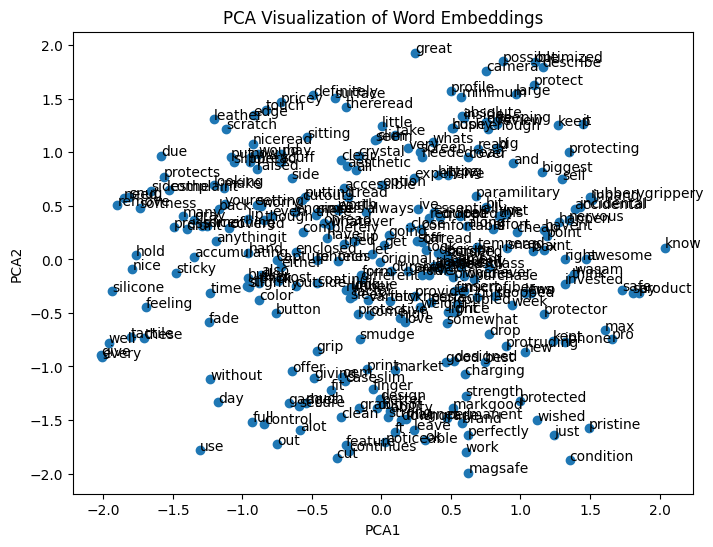

In [14]:
word_vectors = word2vec_model.wv
words = list(word_vectors.index_to_key)
pca = PCA(n_components=2)
word_vecs_pca = pca.fit_transform([word_vectors[word] for word in words])
plt.figure(figsize=(8, 6))
plt.scatter(word_vecs_pca[:, 0], word_vecs_pca[:, 1], marker="o")
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vecs_pca[i, 0], word_vecs_pca[i, 1]))
plt.title("PCA Visualization of Word Embeddings")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

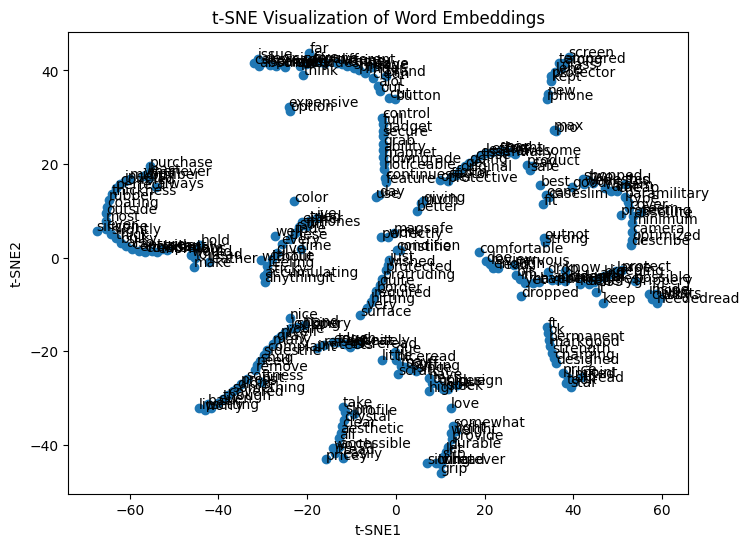

In [15]:
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
word_vectors_list = [word_vectors[word] for word in words]
word_vectors_array = np.array(word_vectors_list)
word_vecs_tsne = tsne.fit_transform(word_vectors_array)
plt.figure(figsize=(8, 6))
plt.scatter(word_vecs_tsne[:, 0], word_vecs_tsne[:, 1], marker="o")
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vecs_tsne[i, 0], word_vecs_tsne[i, 1]))
plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

In [16]:
def cosine_sim(word1, word2, model):
    vec1 = model.wv[word1].reshape(1, -1)
    vec2 = model.wv[word2].reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]
word_pairs = [("great", "good"), ("nice", "best"), ("cheap", "pricey"), ("protect", "hold")]
for w1, w2 in word_pairs:
    similarity = cosine_sim(w1, w2, word2vec_model)
    print(f"Cosine Similarity between '{w1}' and '{w2}': {similarity:.2f}")


Cosine Similarity between 'great' and 'good': 0.12
Cosine Similarity between 'nice' and 'best': 0.33
Cosine Similarity between 'cheap' and 'pricey': 0.31
Cosine Similarity between 'protect' and 'hold': 0.23


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/liteshperumalla/litesh_perumalla_INFO5731_Spring2025/blob/main/amazon_reviews_annotated.csv





https://github.com/liteshperumalla/litesh_perumalla_INFO5731_Spring2025/blob/main/amazon_reviews_annotated.csv

I would choose Sentiment Analysis as it is useful for my type of dataset. My dataset is about amazon customer reviews for a iphone 15 pro max case. Sentiment analysis can be used to know about customer reviews about the product. And to know about the customer satisfaction for the product. And the sales of the product in the market. The sentiment analysis can be used to improve the quality of the product.

I have labeled the reviews in to three categories positive, negative, neutral. And given a list of words as positive feedback, list of words for negative and also same for neutral. And programm checks for these words in the reviews and labels the reviews accordingly. But we need to make sure that the words are present in the data. Other wise the labeling doesn't work.

I have used the AI assistance in labeling the data and generating a csv file with a unique review Id, Cleaned_review text and sentiment analysis.

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer


The Assignment 03 is about writing the code for reviews dataset and getting featutre extraction in various ways from N-grams to the TF-IDF is challenging and with out using any libraries. The output from the code is very intresting intitlay I didn't get any output for the TF-IDF document ranking after tweeking the query. I finally got the output. And After seeing the visualization of word embeddings using t-sine using word2vec is intresting.